In [4]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
#registro de converters para matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#arima
from pmdarima.arima import auto_arima

path = 'AirPassengers.csv'
base = pd.read_csv(path)

def separa():
    print('\n===================================================================\n')

print(base.head())
separa()

#conversão de atributos que estão no formato de string para o formato de data: ANO - MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
print(base)
separa()

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]




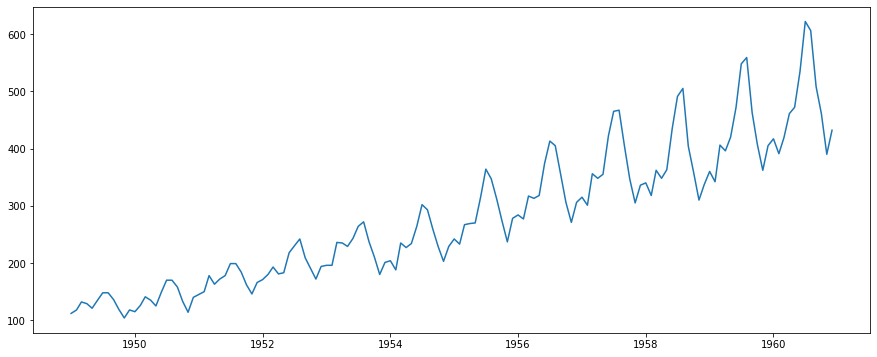

In [6]:
plt.plot(base)

In [15]:
#pqd informa valores iniciais para poupar tempo, max define o máximo de combinações, P parte regressiva para sazonal, m = tempo, trace = gerar saída, seasonal
#seasonal = sazonal, stepwise = otmiza mas não testa tudo que poderia
stepwise_model = auto_arima(base, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal = True, trace = True, stepwise = False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.10 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.20 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.36 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.61 sec
 ARIM

In [8]:
print(stepwise_model.aic())

1019.1780567487567


In [10]:
train = base.loc['1949-01-01':'1959-12-01']
test = base.loc['1960-01-01':]

In [11]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [12]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


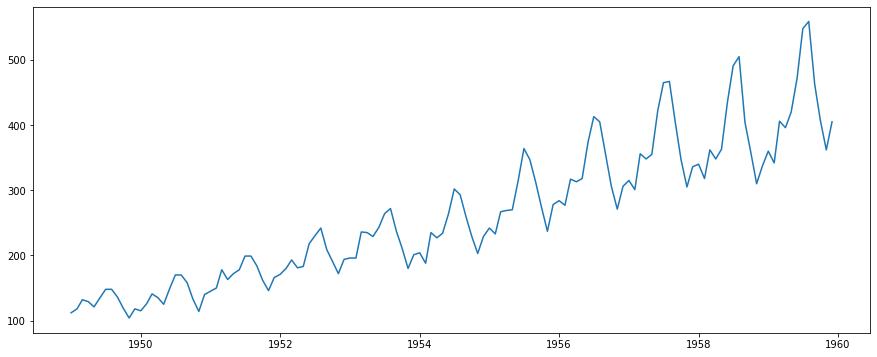

In [13]:
plt.plot(train)

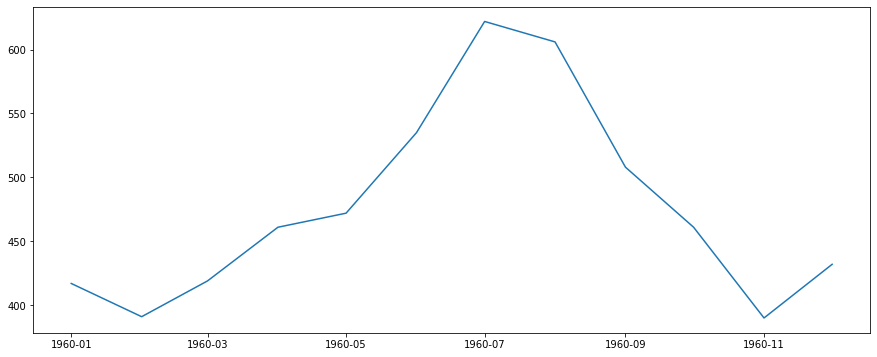

In [14]:
plt.plot(test)

In [16]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [17]:
future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

1960-01-01    420.237414
1960-02-01    398.453361
1960-03-01    461.908103
1960-04-01    450.689533
1960-05-01    474.006576
1960-06-01    537.919686
1960-07-01    612.238342
1960-08-01    623.590381
1960-09-01    520.169748
1960-10-01    462.319623
1960-11-01    412.931297
1960-12-01    453.754639
Freq: MS, dtype: float64

In [18]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['#Passengers'])

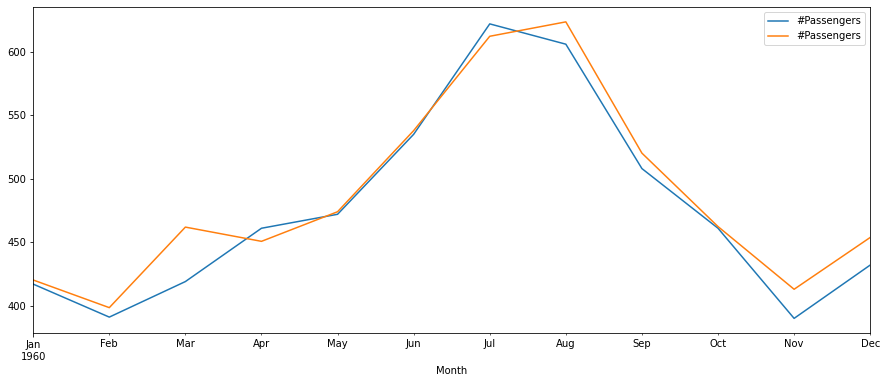

In [19]:
pd.concat([test, future_forecast], axis = 1).plot()

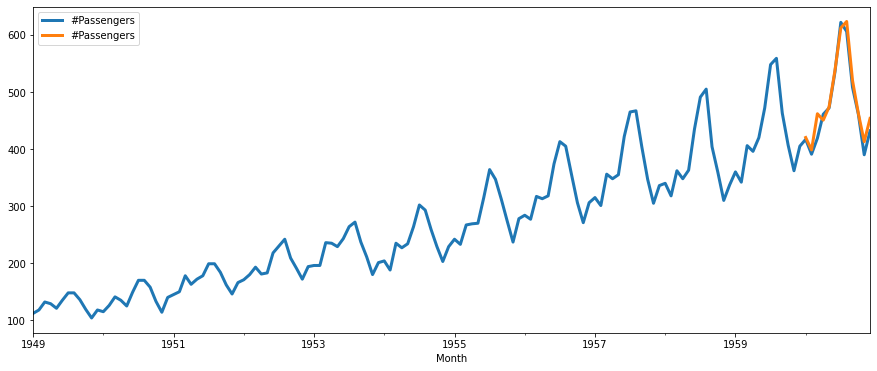

In [20]:
pd.concat([base, future_forecast], axis = 1).plot(linewidth=3)